### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing datasets

In [2]:
df_matches = pd.read_csv("matches.csv")
df_deliveries = pd.read_csv("deliveries.csv")

#### Inspecting the matches data

In [3]:
df_matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
df_matches.shape

(1095, 20)

Number of rows = 1095  
Number of columns = 20

#### Inspecting the deliveries data

In [5]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [6]:
df_deliveries.shape

(260920, 17)

Number of rows = 260920  
Number of columns = 17

### Data Cleaning

In [7]:
df_matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [8]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [9]:
df_deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [10]:
df_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [11]:
df_matches["winner"].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [12]:
df_matches.replace({
    'Delhi Daredevils':'Delhi Capitals',
    'Kings XI Punjab':'Punjab Kings',
    'Rising Pune Supergiants':'Rising Pune Supergiant',
    'Royal Challengers Bangalore':'Royal Challengers Bengaluru'
}, inplace=True)

In [13]:
df_deliveries['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [14]:
df_deliveries.replace({
    'Delhi Daredevils':'Delhi Capitals',
    'Kings XI Punjab':'Punjab Kings',
    'Rising Pune Supergiants':'Rising Pune Supergiant',
    'Royal Challengers Bangalore':'Royal Challengers Bengaluru'
}, inplace=True)

In [15]:
df_deliveries['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bengaluru',
       'Chennai Super Kings', 'Punjab Kings', 'Rajasthan Royals',
       'Delhi Capitals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Gujarat Lions', 'Lucknow Super Giants',
       'Gujarat Titans'], dtype=object)

Assigning one name to the teams with multiple names across different seasons

In [16]:
df_matches['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

In [17]:
stadium_names = {
    'M Chinnaswamy Stadium':'M.Chinnaswamy Stadium',
    'M Chinnaswamy Stadium, Bengaluru':'M.Chinnaswamy Stadium',
    'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association IS Bindra Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association IS Bindra Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh':'Punjab Cricket Association IS Bindra Stadium',
    'Feroz Shah Kotla':'Arun Jaitley Stadium',
    'Arun Jaitley Stadium, Delhi':'Arun Jaitley Stadium',
    'Wankhede Stadium, Mumbai':'Wankhede Stadium',
    'Eden Gardens, Kolkata':'Eden Gardens',
    'Sawai Mansingh Stadium, Jaipur':'Sawai Mansingh Stadium',
    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad':'Rajiv Gandhi International Stadium',
    'MA Chidambaram Stadium, Chepauk':'MA Chidambaram Stadium',
    'MA Chidambaram Stadium, Chepauk, Chennai':'MA Chidambaram Stadium',
    'Dr DY Patil Sports Academy, Mumbai':'Dr DY Patil Sports Academy',
    'Himachal Pradesh Cricket Association Stadium, Dharamsala':'Himachal Pradesh Cricket Association Stadium',
    'Maharashtra Cricket Association Stadium, Pune':'Maharashtra Cricket Association Stadium',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam':'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
    'Brabourne Stadium, Mumbai':'Brabourne Stadium',
    'Zayed Cricket Stadium, Abu Dhabi':'Zayed Cricket Stadium'
}

In [18]:
df_matches.replace({'venue':stadium_names}, inplace=True)

In [19]:
df_matches['venue'].unique()

array(['M.Chinnaswamy Stadium',
       'Punjab Cricket Association IS Bindra Stadium',
       'Arun Jaitley Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium', 'Rajiv Gandhi International Stadium',
       'MA Chidambaram Stadium', 'Dr DY Patil Sports Academy', 'Newlands',
       "St George's Park", 'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket S

In [20]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [21]:
df_matches['city'].fillna(df_matches['venue'], inplace=True)

/tmp/ipykernel_150653/4181702167.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['city'].fillna(df_matches['venue'], inplace=True)


#### Total number of matches till 2024

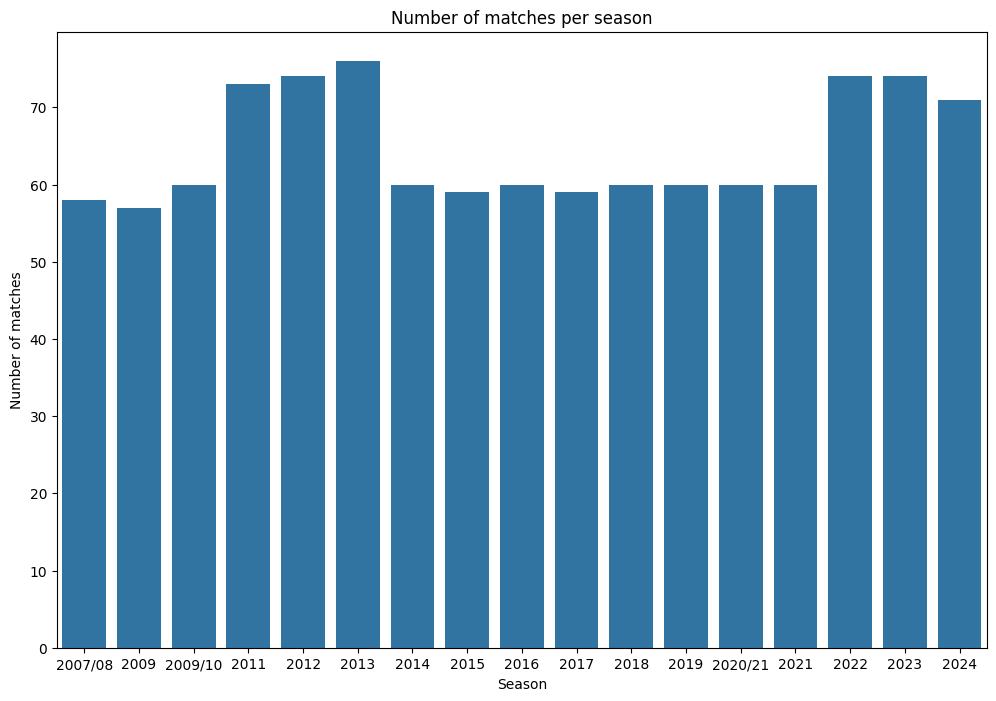

In [22]:
matches_per_season = df_matches['season'].value_counts().sort_index()
plt.figure(figsize=[12, 8])
sns.barplot(x=matches_per_season.index, y=matches_per_season.values)
plt.title("Number of matches per season")
plt.xlabel("Season")
plt.ylabel("Number of matches")
plt.show()

#### Number of teams per season

In [23]:
teams = pd.concat([
    df_matches[['season', 'team1']].rename(columns={
        'team1':'team'
}),
    df_matches[['season', 'team2']].rename(columns={
        'team2':'team'
    })
])

unique_teams = teams.drop_duplicates()
num_team_per_season = unique_teams.groupby('season')['team'].count()
num_team_per_season

season
2007/08     8
2009        8
2009/10     8
2011       10
2012        9
2013        9
2014        8
2015        8
2016        8
2017        8
2018        8
2019        8
2020/21     8
2021        8
2022       10
2023       10
2024       10
Name: team, dtype: int64

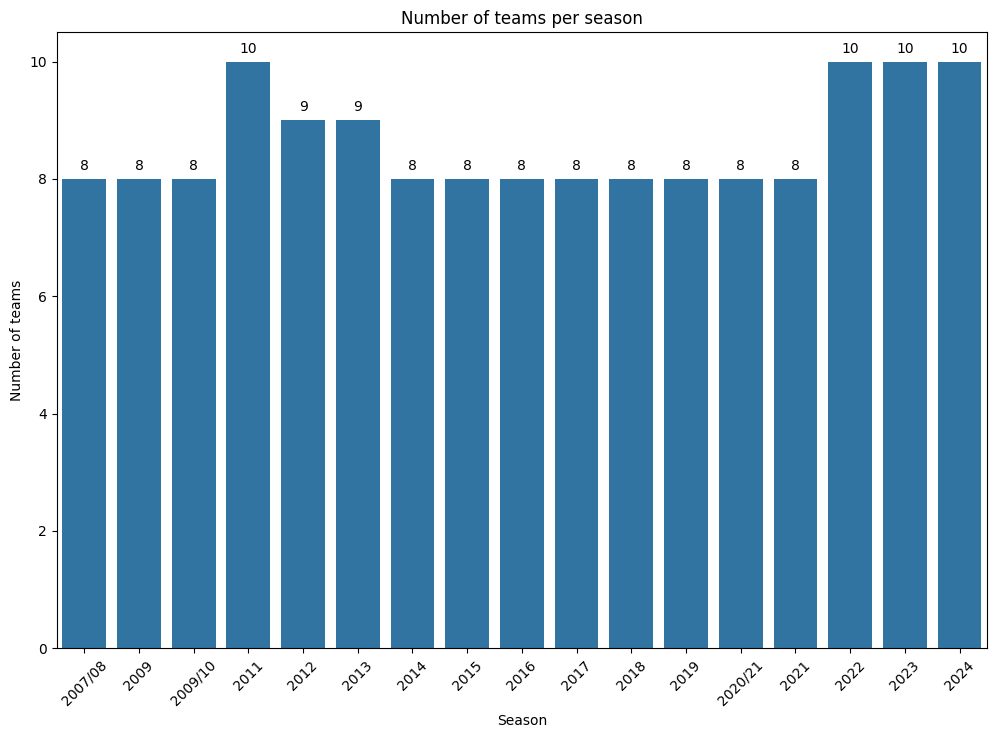

In [24]:
plt.figure(figsize=[12, 8])
sns.barplot(x=num_team_per_season.index, y=num_team_per_season.values)
plt.title("Number of teams per season")
plt.xlabel("Season")
plt.ylabel("Number of teams")
plt.xticks(rotation=45)
for index, value in enumerate(num_team_per_season.values):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)
plt.show()

#### Which team has won most number of matches

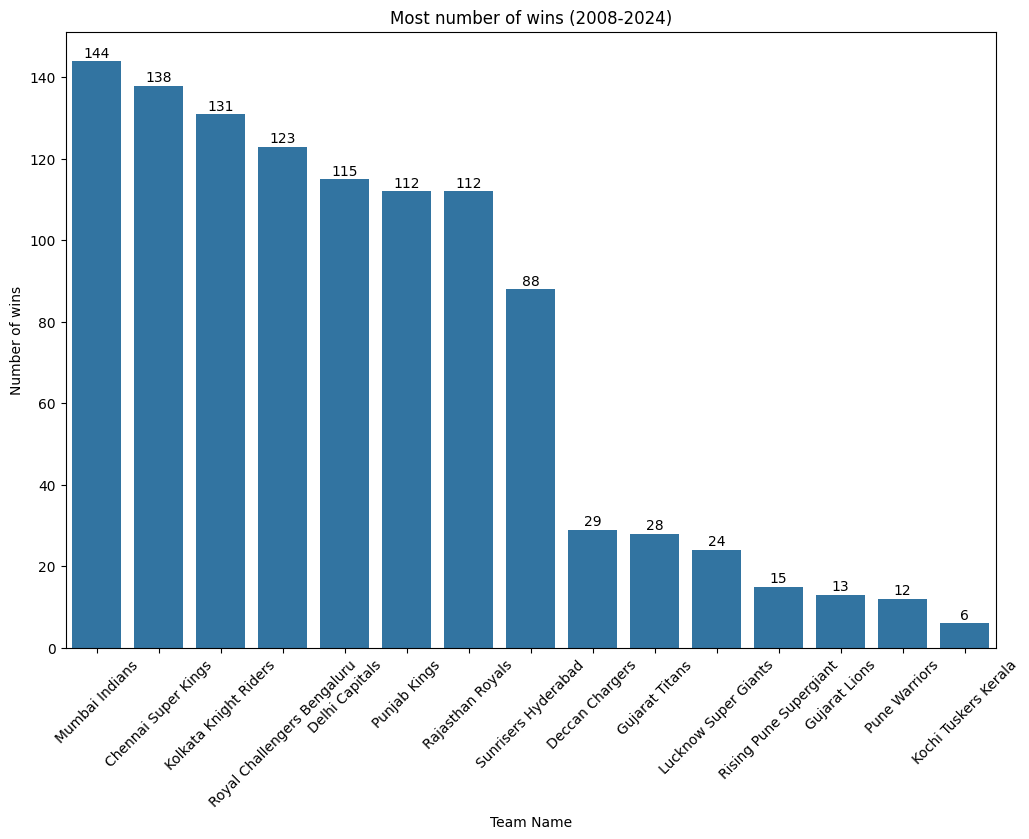

In [25]:
winners = df_matches.groupby('winner')['winner'].value_counts().sort_values(ascending=False)
plt.figure(figsize=[12, 8])
sns.barplot(x=winners.index, y=winners.values)
plt.xticks(rotation=45)
for index, value in enumerate(winners.values):
    plt.text(index, value + 1, str(value), ha='center')
plt.title("Most number of wins (2008-2024)")
plt.xlabel("Team Name")
plt.ylabel("Number of wins")
plt.show()

Observations:
1. Mumbai Indians has won the most number of matches in the IPL
2. Kochi Tuskers Kerala has won the least number of matches in IPLS
3. Out of the teams who have played all seasons, Punjab Kinkgs has won the least number of matches

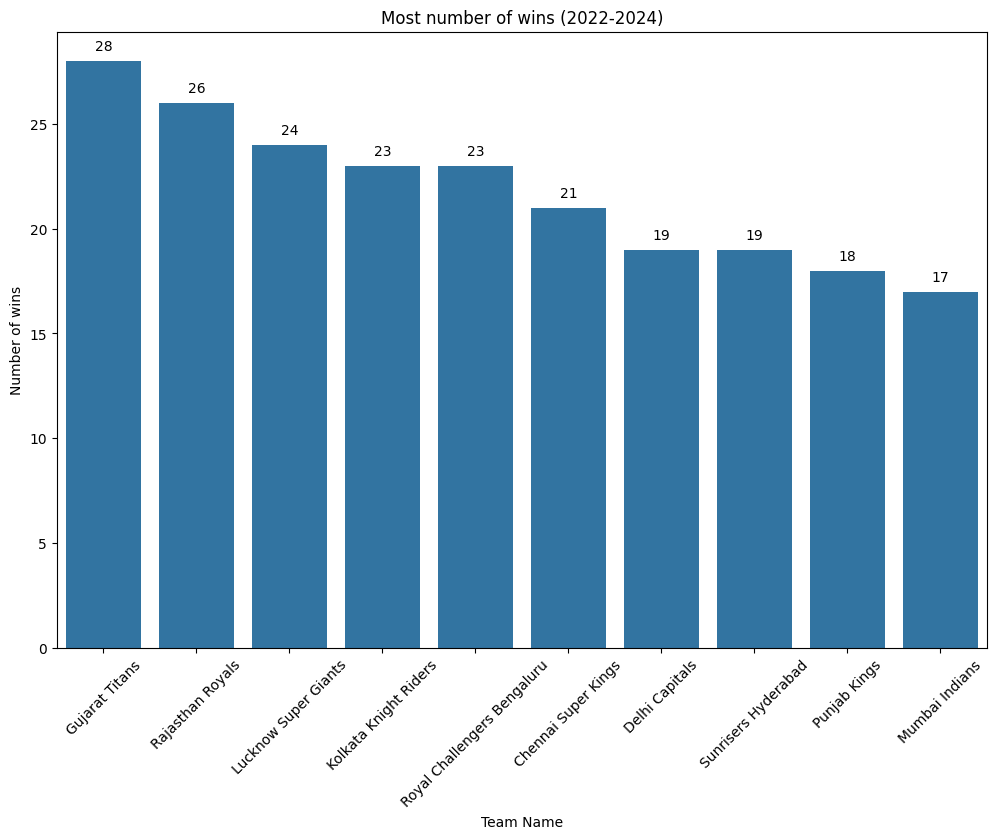

In [26]:
recent = df_matches[df_matches['season'].isin(['2022', '2023', '2024'])]
winners = recent.groupby('winner')['winner'].value_counts().sort_values(ascending=False)
plt.figure(figsize=[12, 8])
sns.barplot(x=winners.index, y=winners.values)
plt.xticks(rotation=45)
for index, value in enumerate(winners.values):
    plt.text(index, value + 0.5, str(value), ha='center')
plt.title("Most number of wins (2022-2024)")
plt.xlabel("Team Name")
plt.ylabel("Number of wins")
plt.show()

Observations:
Since 2022 (when two new teams were introduced):
1. Gujarat Titans has won the most number of matches
2. Mumbai Indians has won the least number of matches

#### Does toss effect the match result

In [27]:
total_matches_with_result = df_matches[df_matches['winner'].notnull()]
len(total_matches_with_result)

1090

In [28]:
matches_won_by_team_winning_toss = total_matches_with_result[total_matches_with_result['toss_winner']== total_matches_with_result['winner']]
len(matches_won_by_team_winning_toss)

554

In [29]:
print("Percentage of teams winning after winning the toss = ", round((len(matches_won_by_team_winning_toss)/len(total_matches_with_result))*100, 2), "%")

Percentage of teams winning after winning the toss =  50.83 %


Observation:
In the long run, considering all the teams and matches, the toss doesnot play an important role.

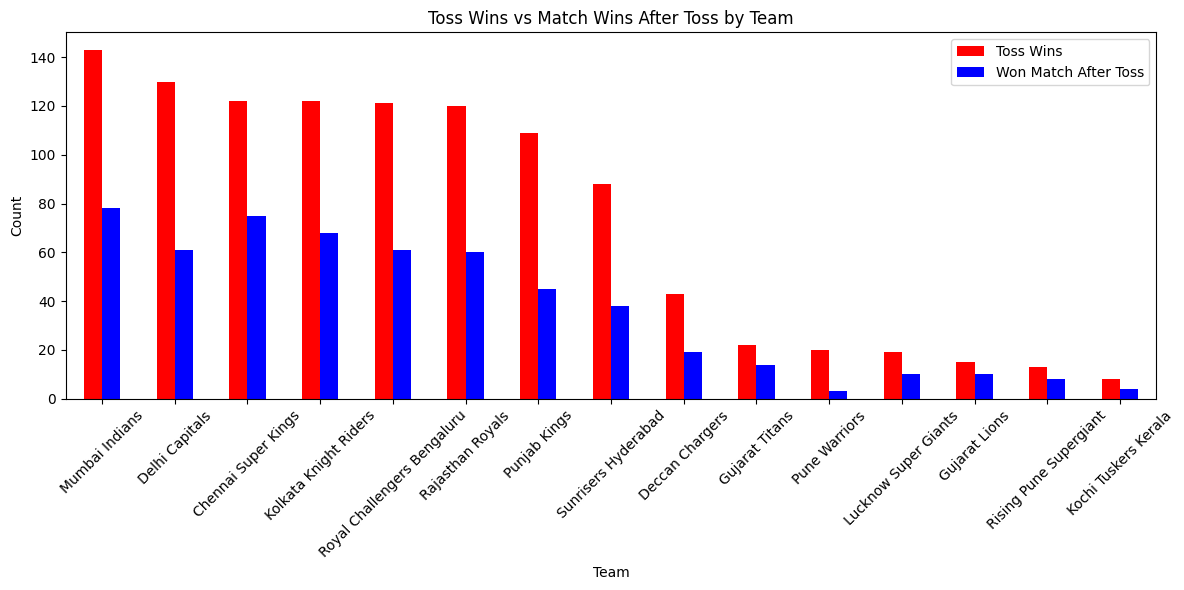

In [30]:
toss_data = df_matches[df_matches['toss_winner'].notnull()]

toss_wins = toss_data['toss_winner'].value_counts()

toss_and_match_wins = toss_data[toss_data['toss_winner'] == toss_data['winner']]
toss_match_wins = toss_and_match_wins['winner'].value_counts()

df_toss_comparison = pd.DataFrame({
    'Toss Wins': toss_wins,
    'Won Match After Toss': toss_match_wins
}).astype(int).sort_values('Toss Wins', ascending=False)

df_toss_comparison.plot(kind='bar', figsize=(12, 6), color=['red', 'blue'])

plt.title('Toss Wins vs Match Wins After Toss by Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

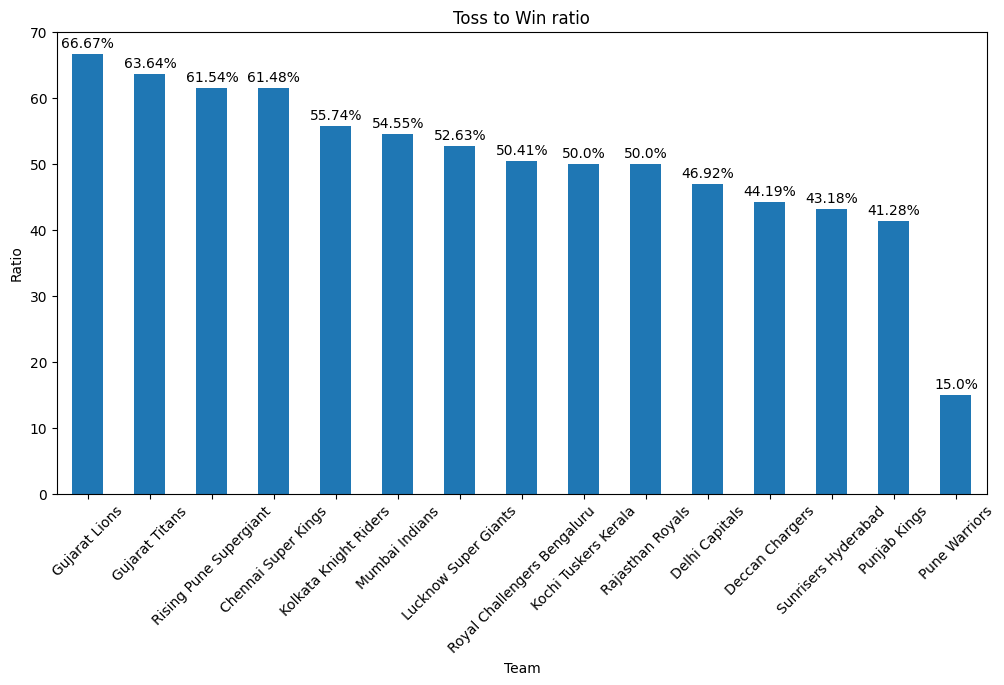

In [31]:
percentage_match_won_after_toss_won = df_toss_comparison['Won Match After Toss']/df_toss_comparison['Toss Wins']*100
percentage_match_won_after_toss_won = percentage_match_won_after_toss_won.sort_values(ascending=False)
percentage_match_won_after_toss_won.plot(kind="bar", figsize=(12, 6))
for index, value in enumerate(percentage_match_won_after_toss_won.values):
    plt.text(index, value+1, str(round(value, 2)) + "%", ha="center")
plt.title("Toss to Win ratio")
plt.xlabel("Team")
plt.ylabel("Ratio")
plt.xticks(rotation=45)
plt.show()

Observation:
After winning the toss:
1. Gujarat Lions have the best toss to win ratio
2. Pune Warriors have the best toss to win ratio

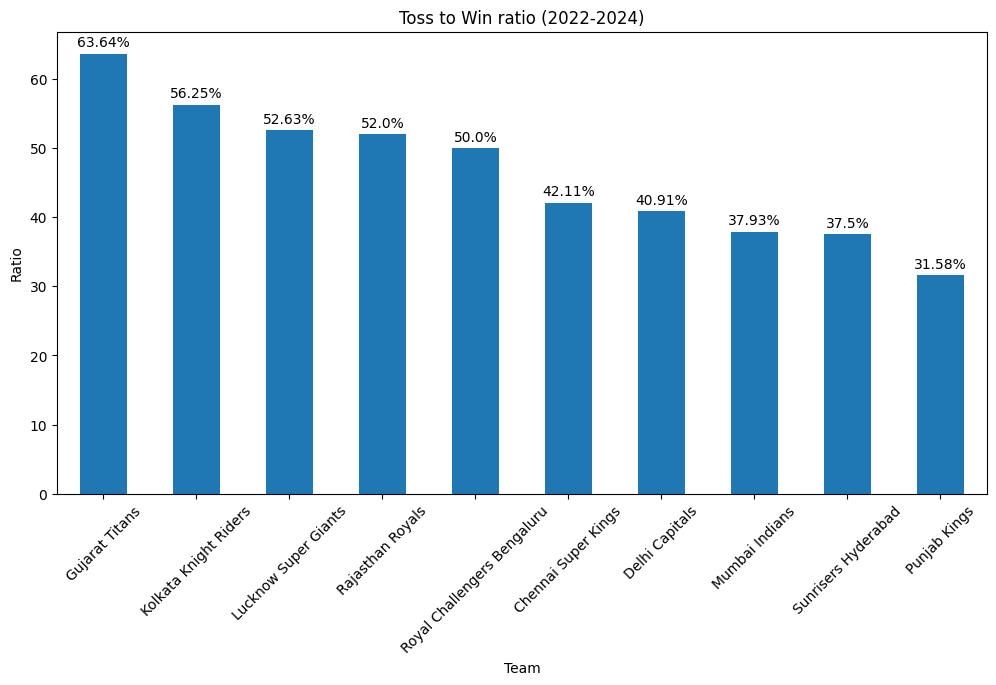

In [32]:
toss_data = df_matches[df_matches['toss_winner'].notnull()]
toss_data = toss_data[toss_data['season'] > '2021']

toss_wins = toss_data['toss_winner'].value_counts()

toss_and_match_wins = toss_data[toss_data['toss_winner'] == toss_data['winner']]
toss_match_wins = toss_and_match_wins['winner'].value_counts()

df_toss_comparison = pd.DataFrame({
    'Toss Wins': toss_wins,
    'Won Match After Toss': toss_match_wins
}).astype(int).sort_values('Toss Wins', ascending=False)

percentage_match_won_after_toss_won = df_toss_comparison['Won Match After Toss']/df_toss_comparison['Toss Wins']*100
percentage_match_won_after_toss_won = percentage_match_won_after_toss_won.sort_values(ascending=False)
percentage_match_won_after_toss_won.plot(kind="bar", figsize=(12, 6))
for index, value in enumerate(percentage_match_won_after_toss_won.values):
    plt.text(index, value+1, str(round(value, 2)) + "%", ha="center")
plt.title("Toss to Win ratio (2022-2024)")
plt.xlabel("Team")
plt.ylabel("Ratio")
plt.xticks(rotation=45)
plt.show()

Observations:
Since 2022:
1. Gujarat Titans has the best toss-to-win ratio
2. Punjab Kings has the worst toss-to-win ratio

#### Players with most man of the match awards

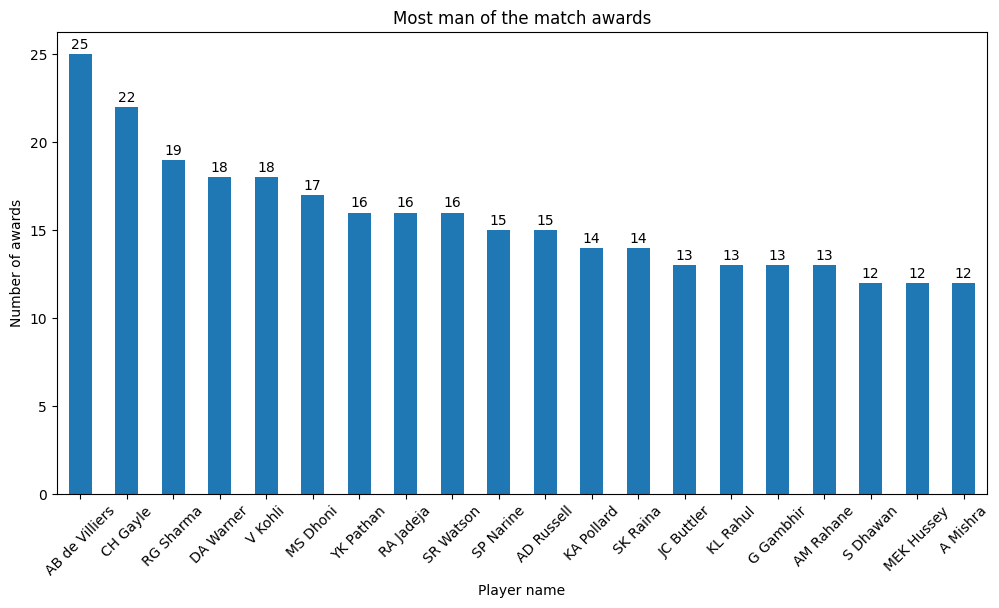

In [33]:
match_data = df_matches[df_matches["player_of_match"].notnull()]
man_of_match = match_data.groupby('player_of_match')['player_of_match'].value_counts().sort_values(ascending=False).head(20)
man_of_match.plot(kind="bar", figsize=(12, 6))
for index, value in enumerate(man_of_match.values):
    plt.text(index, value+0.3, str(value), ha="center")
plt.title("Most man of the match awards")
plt.xlabel("Player name")
plt.ylabel("Number of awards")
plt.xticks(rotation=45)
plt.show()

Observation: AB de Villiers has won the most player of the match awards (25) in the IPL

#### Success rate of the teams

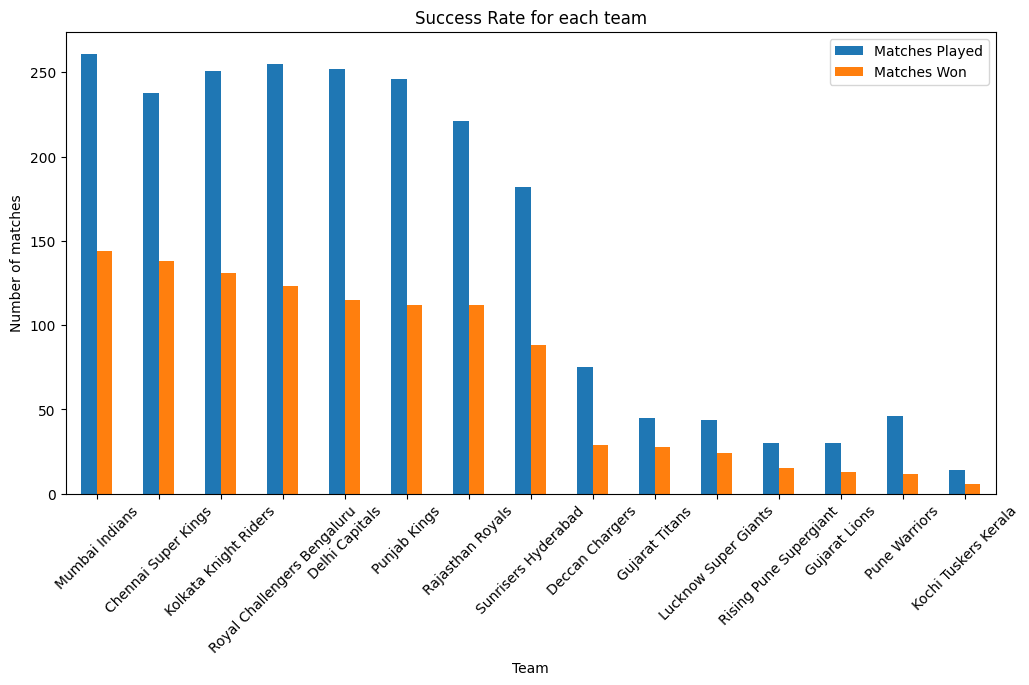

In [34]:
matches_won = df_matches['winner'].value_counts()
matches_played = pd.concat([df_matches['team1'], df_matches['team2']]).value_counts()
df_comparison = pd.DataFrame({
    'Matches Played':matches_played,
    'Matches Won': matches_won
}).sort_values(by= 'Matches Won',ascending=False)
df_comparison.plot(kind="bar", figsize=(12, 6))
plt.title("Success Rate for each team")
plt.xlabel("Team")
plt.ylabel("Number of matches")
plt.xticks(rotation=45)


plt.show()

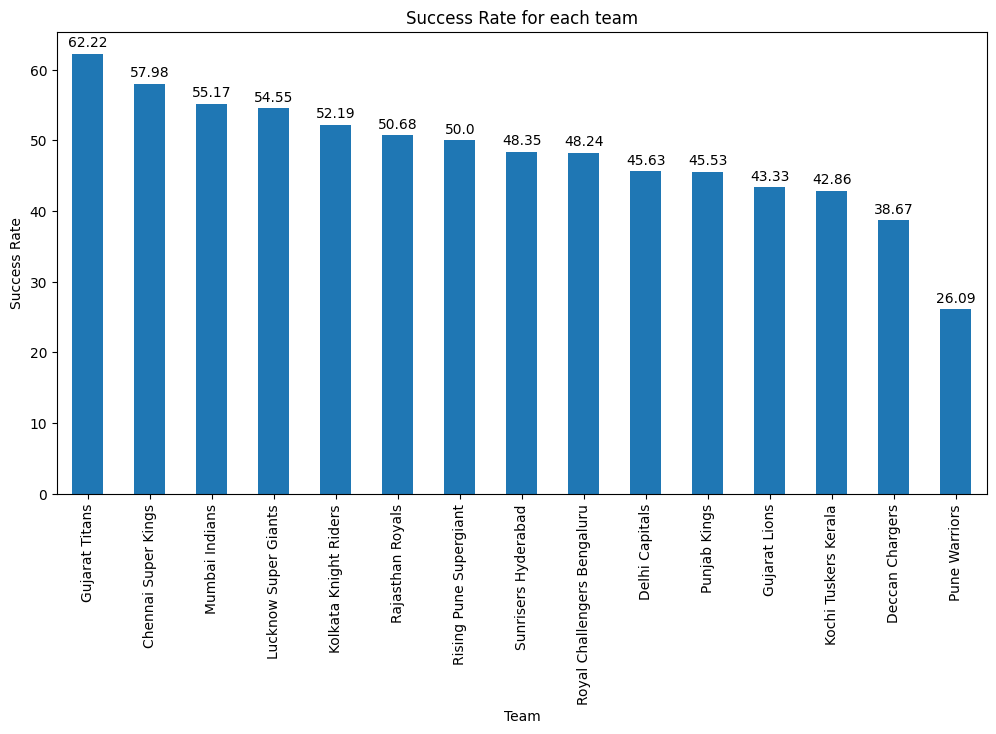

In [35]:
df_success_rate = (df_comparison['Matches Won'] / df_comparison['Matches Played']) * 100
df_success_rate = df_success_rate.sort_values(ascending=False)
df_success_rate.plot(kind="bar", figsize=(12, 6))
plt.title("Success Rate for each team")
plt.xlabel("Team")
plt.ylabel("Success Rate")
for index, value in enumerate(df_success_rate):
    plt.text(index, value+1, str(round(value, 2)), ha="center")
plt.show()

Observations:
1. Gujarat Titans has the best success rate.
2. Pune Warriors has the worst succes rate.

#### Most title wins

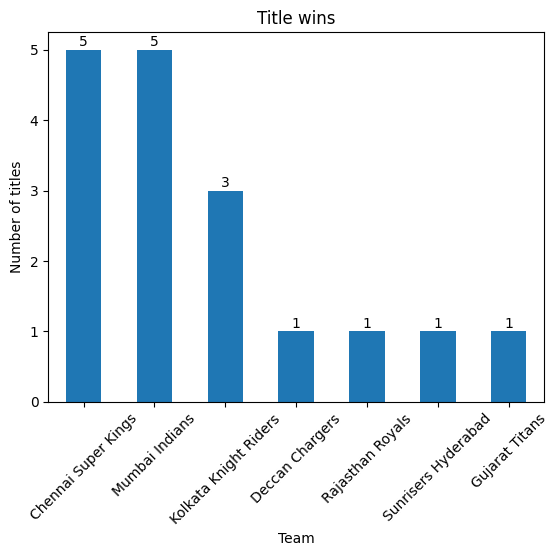

In [36]:
final_wins = df_matches[df_matches['match_type']=='Final']['winner'].value_counts()
final_wins.plot(kind="bar")
plt.title("Title wins")
plt.xlabel("Team")
plt.ylabel("Number of titles")
plt.xticks(rotation=45)
for index, value in enumerate(final_wins):
    plt.text(index, value+0.05, str(round(value, 2)), ha="center")
plt.show()

#### Player wise stats

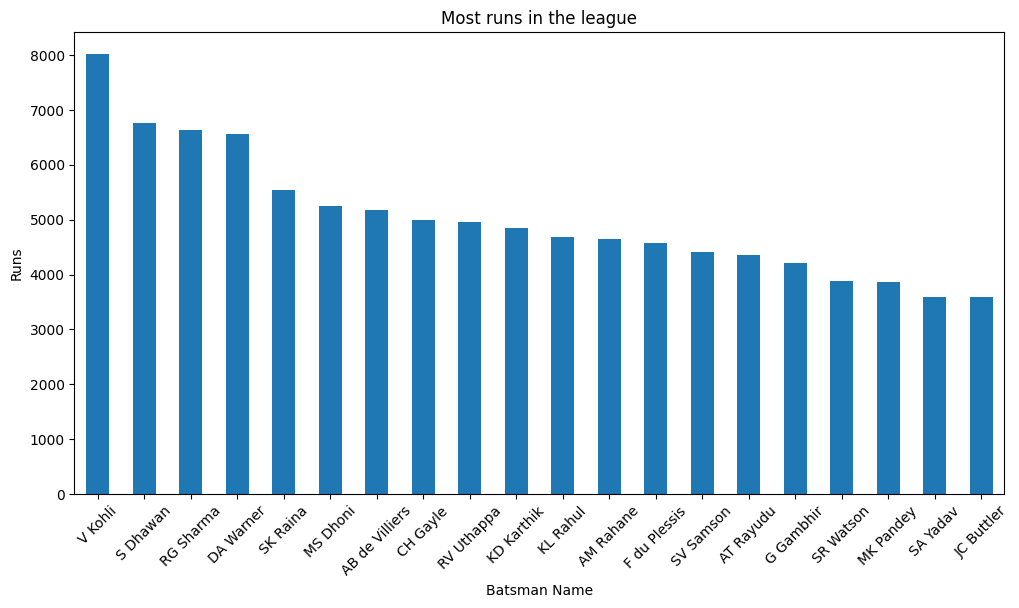

In [37]:
# Players with most runs
most_runs = df_deliveries.groupby("batter")
most_runs = most_runs.sum()['batsman_runs'].sort_values(ascending=False).head(20)
most_runs.plot(kind="bar", figsize=(12, 6))
plt.xlabel("Batsman Name")
plt.ylabel("Runs")
plt.title("Most runs in the league")
plt.xticks(rotation=45)
plt.show()

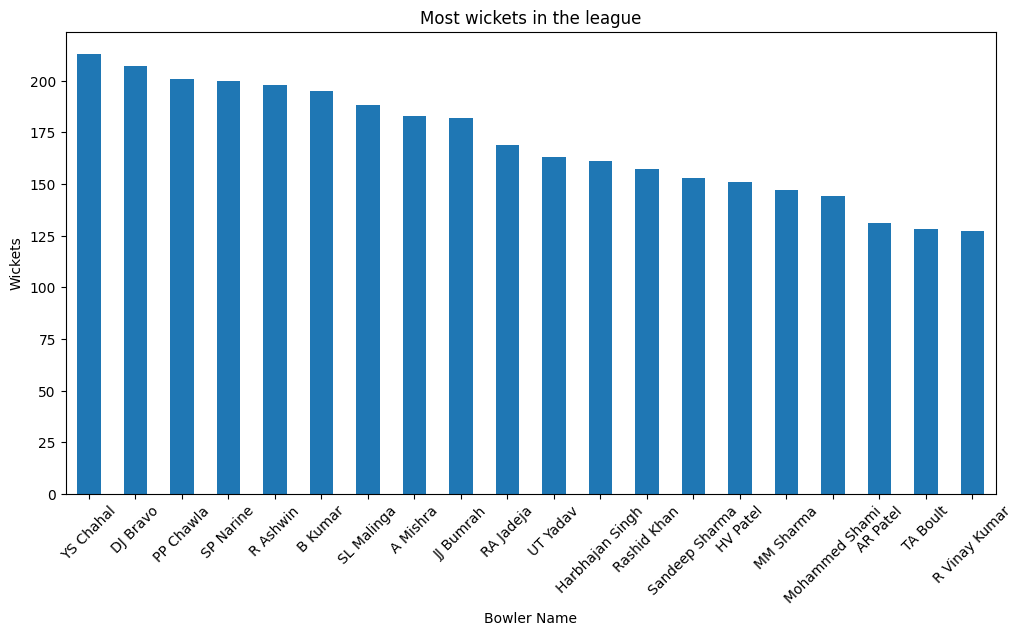

In [38]:
# Players with most wickets
most_wickets = df_deliveries[df_deliveries['is_wicket'] == 1].groupby('bowler')['bowler'].value_counts().sort_values(ascending=False).head(20)
most_wickets.plot(kind="bar", figsize=(12, 6))
plt.xlabel("Bowler Name")
plt.ylabel("Wickets")
plt.title("Most wickets in the league")
plt.xticks(rotation=45)
plt.show()

In [39]:
runs_innings = df_deliveries.groupby(['batter', 'match_id'])['batsman_runs'].sum().reset_index(name="runs")
best_batting_innings = runs_innings.sort_values('runs', ascending=False).head(10)
best_batting_innings

,batter,match_id,runs
2469,CH Gayle,598027,175
2027,BB McCullum,335982,158
10501,Q de Kock,1304112,140
415,AB de Villiers,829795,133
6861,KL Rahul,1216510,132
430,AB de Villiers,980987,129
14859,Shubman Gill,1370352,129
2461,CH Gayle,548372,128
11861,RR Pant,1136602,128
7691,M Vijay,419137,127


In [40]:
runs_df = df_deliveries.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index(name="runs")
balls_df = df_deliveries[~df_deliveries["extras_type"].isin(['wides', 'penalty'])].groupby(['match_id', 'batter']).size().reset_index(name='balls')
batting_stats = pd.merge(runs_df, balls_df, on=['match_id', 'batter'])
batting_stats['strike_rate'] = batting_stats['runs']/batting_stats['balls'] * 100
batting_stats['strike_rate'] = round(batting_stats['strike_rate'], 2)
top_innings = batting_stats.sort_values(by='runs', ascending=False).head(20)
top_innings

,match_id,batter,runs,balls,strike_rate
5302,598027,CH Gayle,175,66,265.15
2,335982,BB McCullum,158,73,216.44
14105,1304112,Q de Kock,140,70,200.00
7527,829795,AB de Villiers,133,59,225.42
11581,1216510,KL Rahul,132,69,191.30
15379,1370352,Shubman Gill,129,60,215.00
8358,980987,AB de Villiers,129,52,248.08
4687,548372,CH Gayle,128,62,206.45
10147,1136602,RR Pant,128,63,203.17
2237,419137,M Vijay,127,56,226.79


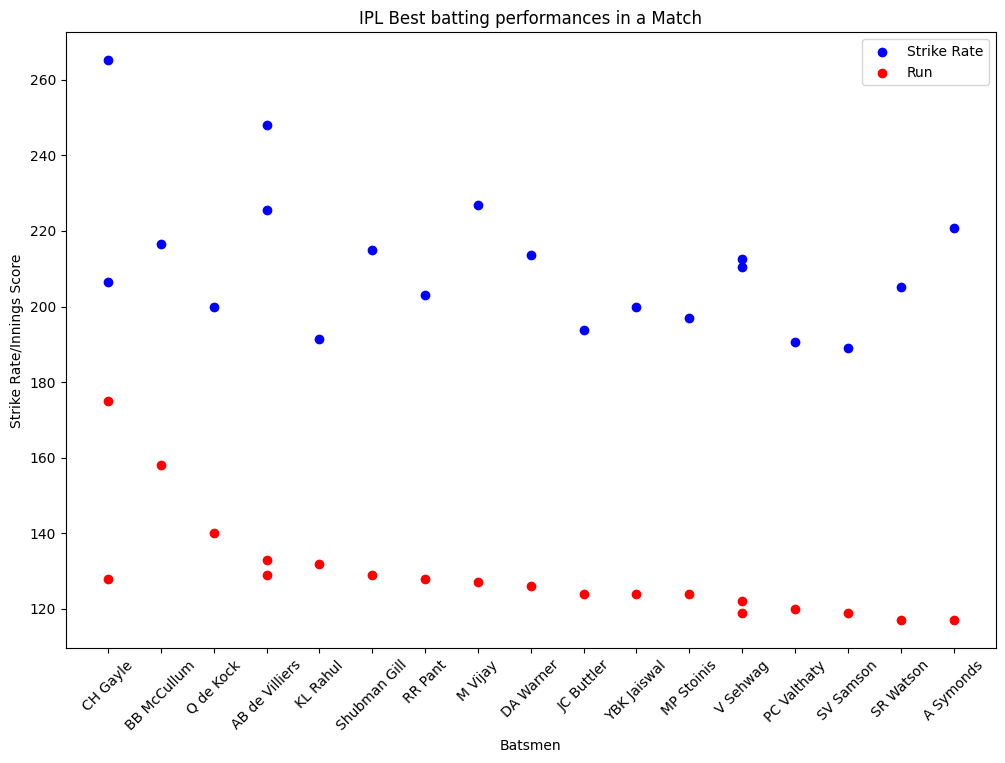

In [41]:
plt.figure(figsize=(12, 8))

plt.scatter(top_innings['batter'], top_innings['strike_rate'], color='blue', label='Strike Rate')

plt.scatter(top_innings['batter'], top_innings['runs'], color='red', label='Run')

plt.xlabel("Batsmen")
plt.ylabel("Strike Rate/Innings Score")
plt.title("IPL Best batting performances in a Match")
plt.xticks(rotation=45)
plt.legend()
plt.show()


#### Cities with most matches played

Mumbai        173
Kolkata        93
Delhi          90
Chennai        85
Hyderabad      77
Bangalore      65
Chandigarh     61
Jaipur         57
Others        394
dtype: int64

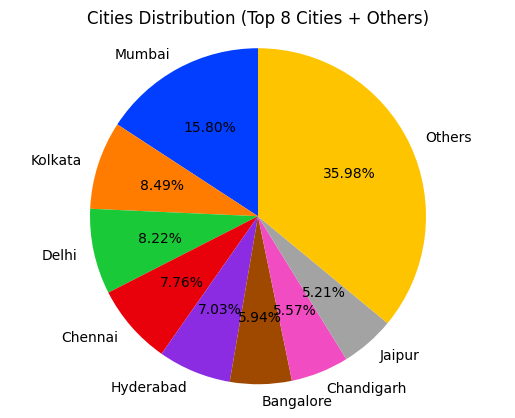

In [42]:
df_cities = df_matches.groupby('city')['city'].size().sort_values(ascending=False)
top_five = df_cities.head(8)
others = df_cities[8:].sum()
final_data = pd.concat([top_five, pd.Series({'Others':others})])
palette_color = sns.color_palette('bright')
plt.pie(final_data, labels=final_data.index, colors=palette_color, autopct='%.2f%%', startangle=90)
plt.title("Cities Distribution (Top 8 Cities + Others)")
plt.axis('equal')
final_data

In [43]:
df_matches.groupby('city')['city'].size().sort_values().head(5)

city
Bloemfontein    2
East London     3
Kimberley       3
Guwahati        3
Nagpur          3
Name: city, dtype: int64

Observations:
1. Mumbai has hosted most number of matches followed by Kolkata and Delhi.
2. Bloemfontein has hosted the least number of matches followed by East London and Kimberley

#### Results based on Duckworth-Lewis

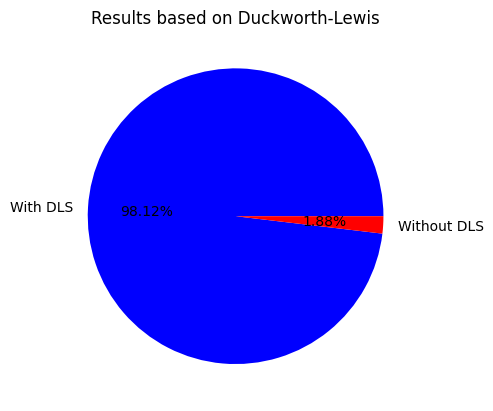

In [57]:
mathces_without_dls = df_matches[~df_matches['result'].isin(['no result']) & df_matches['method']!='D/L']['result'].value_counts().sum()
matches_with_dls = df_matches[~df_matches['result'].isnull()].groupby('method')['method'].value_counts().iloc[0]
data = [mathces_without_dls, matches_with_dls]
keys = ['With DLS', 'Without DLS']
plt.pie(data, labels=keys, autopct='%.2f%%', colors=['blue', 'red'])
plt.title("Results based on Duckworth-Lewis")
plt.show()

#### Top umpires to feature in IPL matches

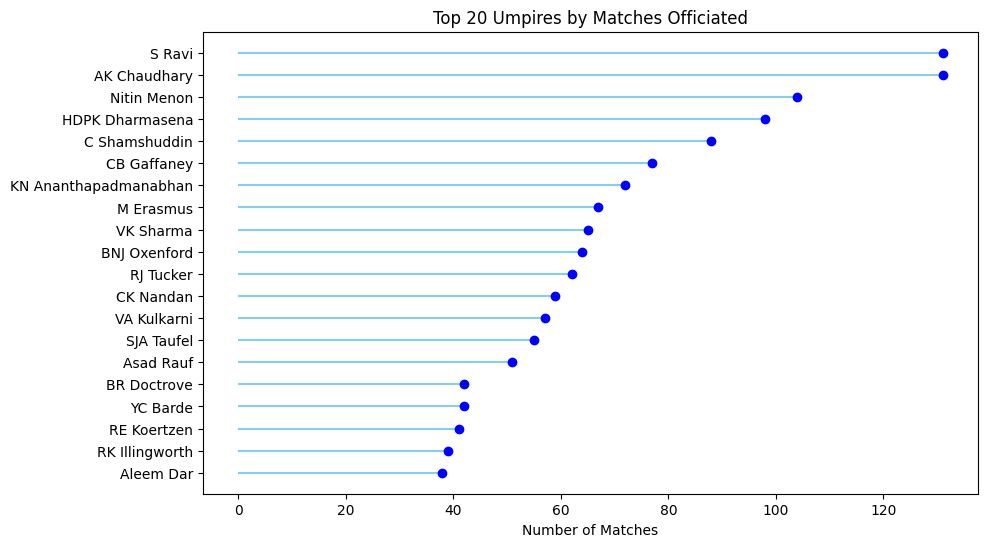

In [61]:
umpires = top_20.sort_values()
plt.figure(figsize=(10, 6))
plt.hlines(y=umpires.index, xmin=0, xmax=umpires.values, color='skyblue')
plt.plot(umpires.values, umpires.index, 'o', color='blue')
plt.title("Top 20 Umpires by Matches Officiated")
plt.xlabel("Number of Matches")
plt.show()


Observations:  
S Ravi and AK Chaudhary have been featured in most number of matches

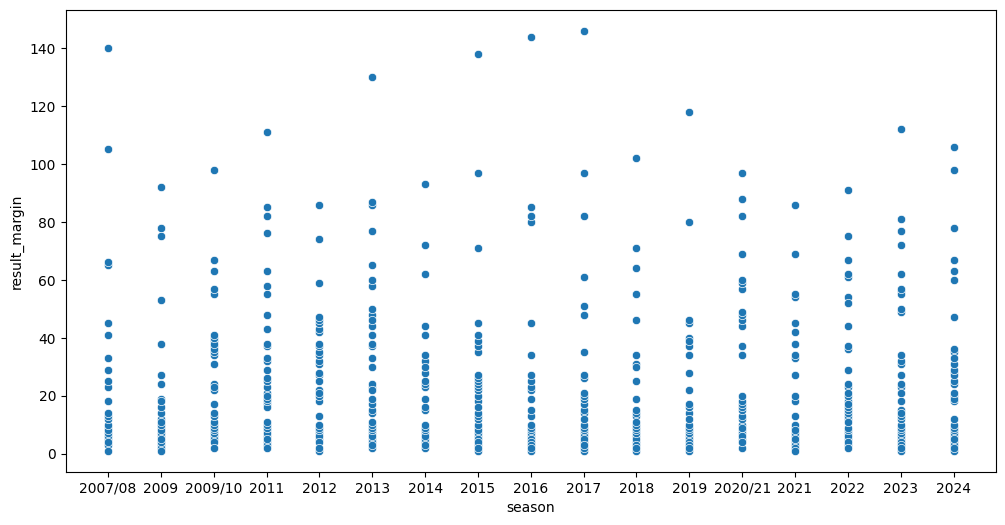

In [83]:
result_margins = df_matches.groupby('season')['result_margin'].value_counts().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.scatterplot(data=result_margins, x='season', y='result_margin')
plt.show()

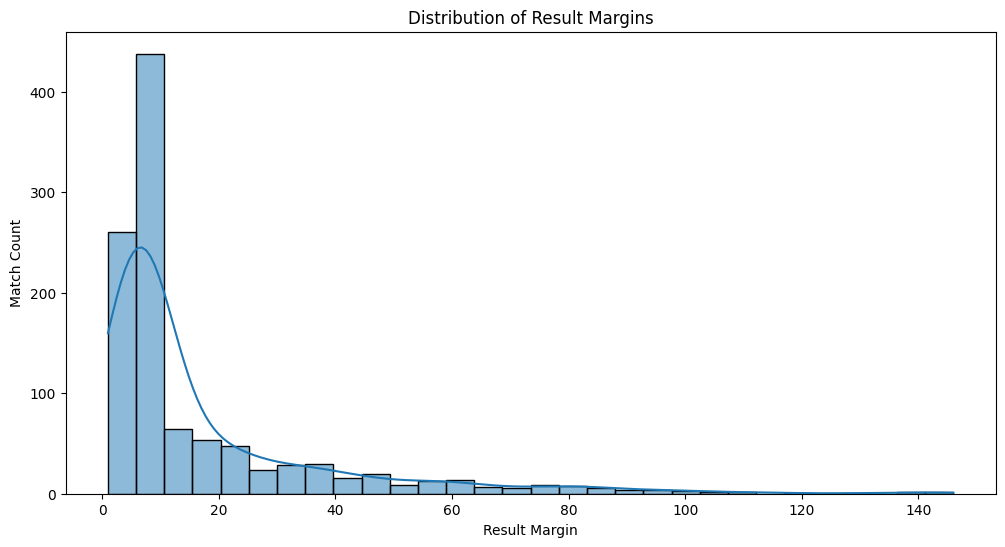

In [97]:
plt.figure(figsize=(12, 6))
sns.histplot(df_matches['result_margin'].dropna(), bins=30, kde=True)
plt.title("Distribution of Result Margins")
plt.xlabel("Result Margin")
plt.ylabel("Match Count")
plt.show()


Observation: Most of the matches end up with a difference of runs between 

#### Most reasons for dismissal

In [100]:
df_deliveries[df_deliveries['is_wicket'] == 1]['dismissal_kind'].unique()

array(['caught', 'bowled', 'run out', 'lbw', 'retired hurt', 'stumped',
       'caught and bowled', 'hit wicket', 'obstructing the field',
       'retired out'], dtype=object)

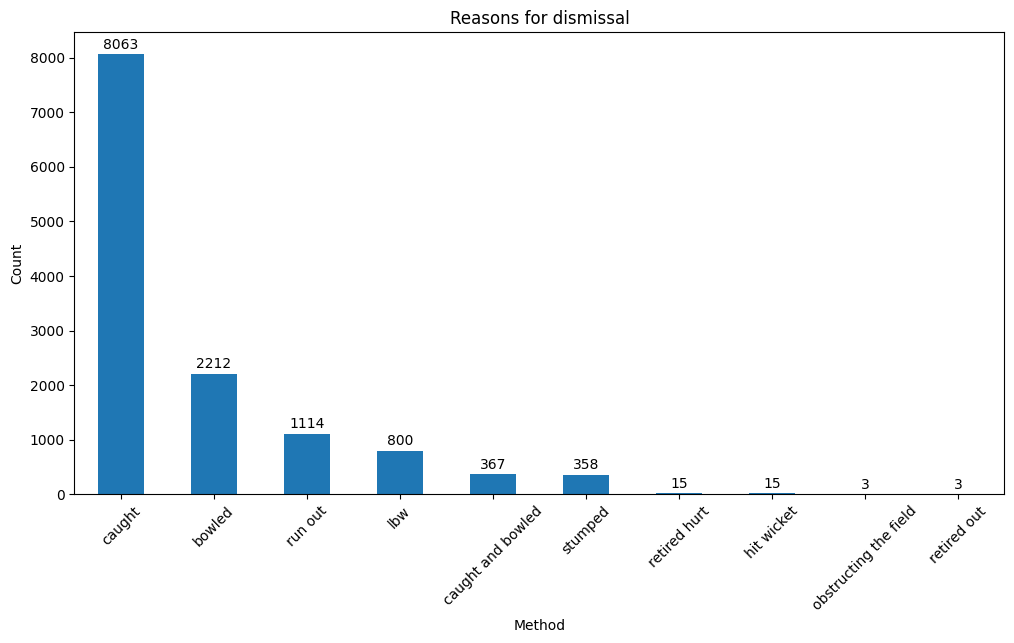

In [124]:
df = df_deliveries[df_deliveries['is_wicket'] == 1].groupby('dismissal_kind')['dismissal_kind'].value_counts().sort_values(ascending=False)
df.plot(kind='bar', figsize=(12, 6))
plt.title("Reasons for dismissal")
plt.xlabel('Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
for index, value in enumerate(df):
    plt.text(index, value+100, str(value), ha='center')
plt.show()

Observation: Caught out is the most frequent dismissal way in the IPL

#### Best fielders

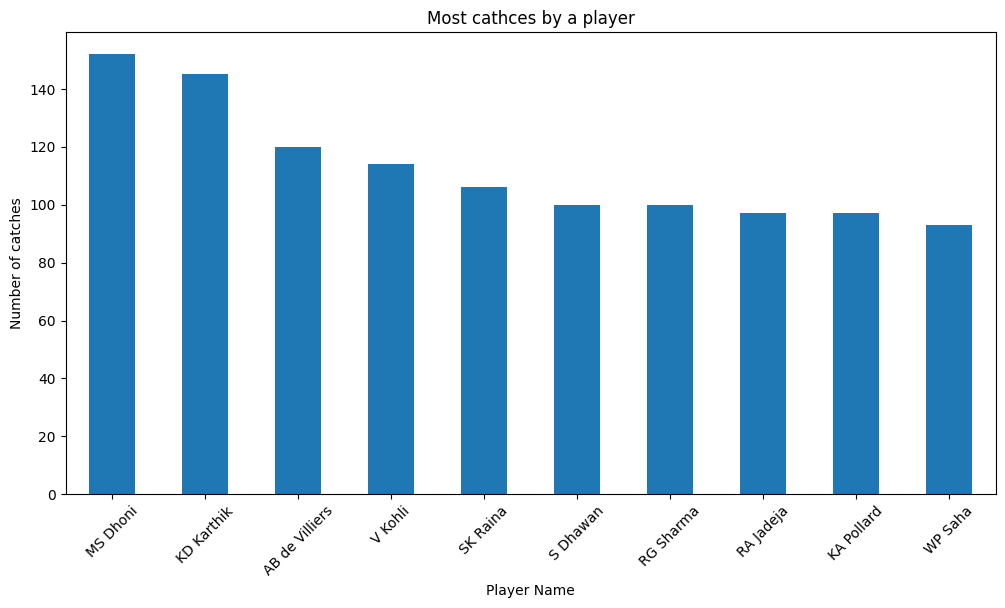

In [140]:
df_catches = df_deliveries[df_deliveries['dismissal_kind'].isin(['caught', 'caught and bowled']) & df_deliveries['is_wicket'] == 1]
catches_count = df_catches.groupby('fielder')['fielder'].value_counts().sort_values(ascending=False)
catches_count.head(10).plot(kind='bar', figsize=(12, 6))
plt.title("Most cathces by a player")
plt.xlabel("Player Name")
plt.ylabel("Number of catches")
plt.xticks(rotation=45)
plt.show()

#### Toss Decision

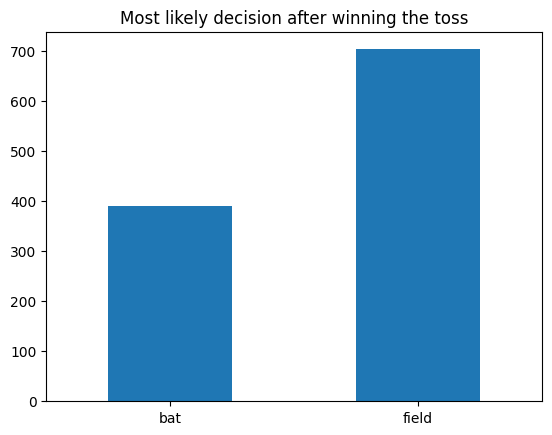

In [150]:
df_matches.groupby('toss_decision')['toss_decision'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Most likely decision after winning the toss")
plt.xlabel("")
plt.ylabel("")
plt.show()

#### Analysis over by over

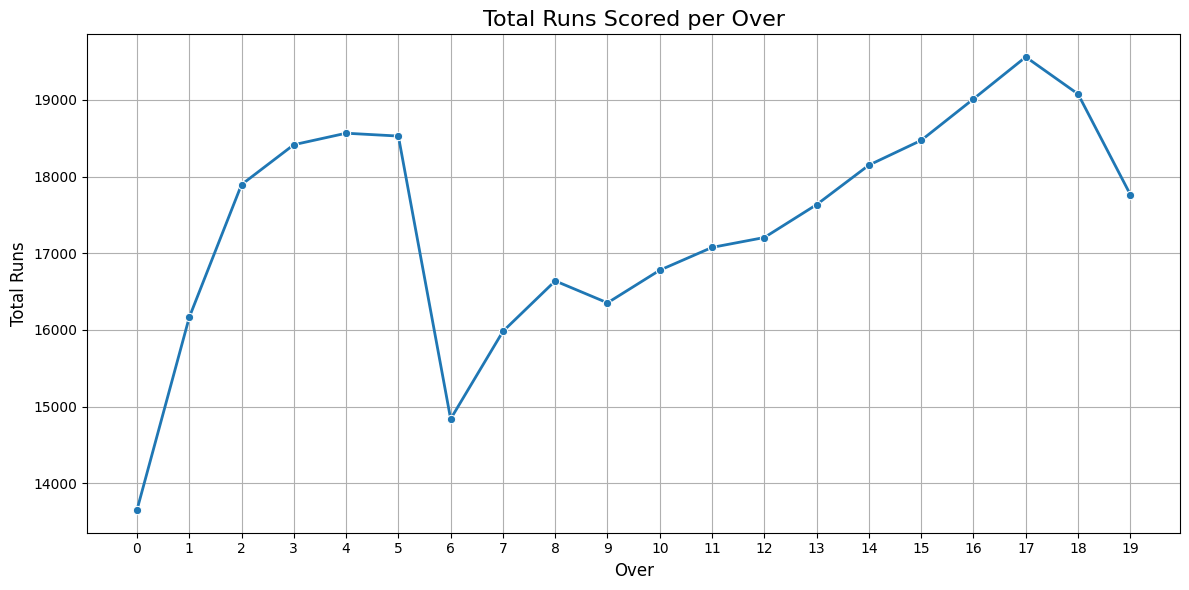

In [163]:
total_runs_per_over = df_deliveries.groupby('over')['total_runs'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_runs_per_over, x='over', y='total_runs', marker='o', linewidth=2)
plt.title('Total Runs Scored per Over', fontsize=16)
plt.xlabel('Over', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.grid(True)
plt.xticks(range(df_deliveries['over'].min(), df_deliveries['over'].max() + 1))
plt.tight_layout()
plt.show()

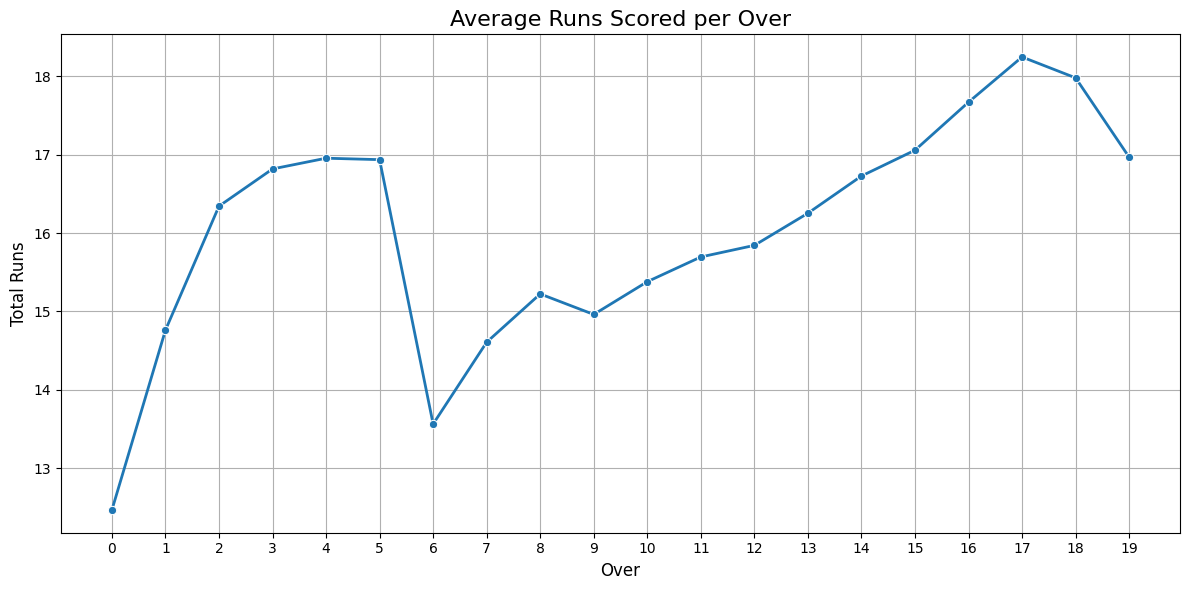

In [185]:
over_count = df_deliveries.groupby('over')['match_id'].nunique().reset_index(name='count')
df = pd.merge(total_runs_per_over, over_count, on='over')
df['avg_runs'] = df['total_runs'] / df['count']
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='over', y='avg_runs', marker='o', linewidth=2)
plt.title('Average Runs Scored per Over', fontsize=16)
plt.xlabel('Over', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.grid(True)
plt.xticks(range(df_deliveries['over'].min(), df_deliveries['over'].max() + 1))
plt.tight_layout()
plt.show()


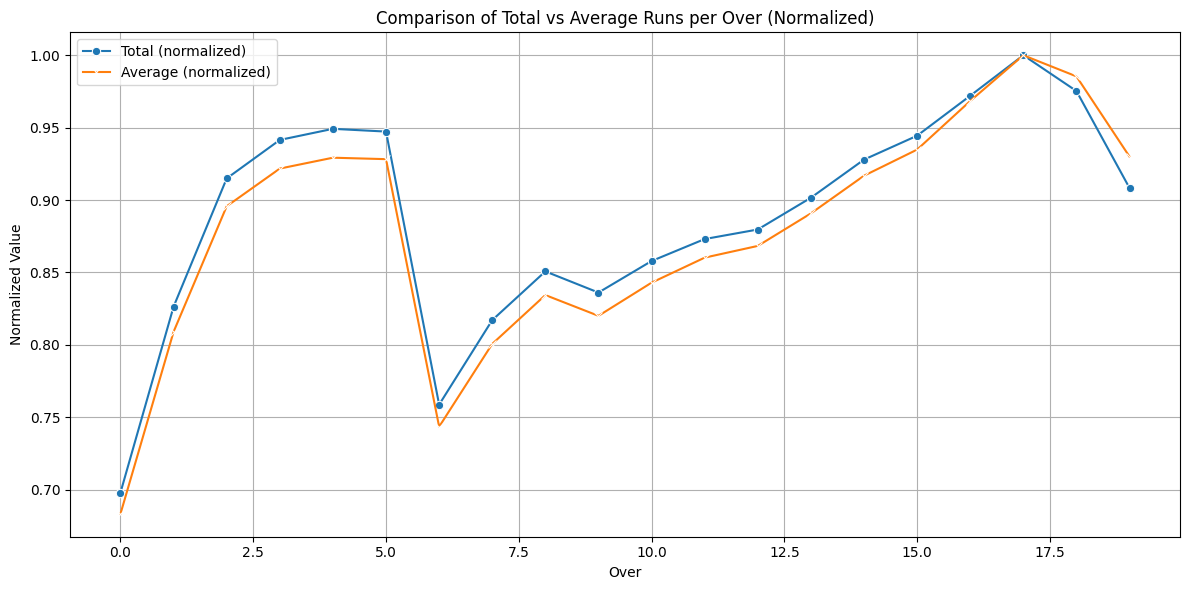

In [186]:
df['total_normalized'] = df['total_runs'] / df['total_runs'].max()
df['avg_normalized'] = df['avg_runs'] / df['avg_runs'].max()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='over', y='total_normalized', label='Total (normalized)', marker='o')
sns.lineplot(data=df, x='over', y='avg_normalized', label='Average (normalized)', marker='x')
plt.title("Comparison of Total vs Average Runs per Over (Normalized)")
plt.xlabel("Over")
plt.ylabel("Normalized Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Observations:  
1. The avg runs per over and total runs per over graphs looks almost identical
2. In the powerplay, batters go hard and try to score more runs
3. After powerplay, the scoring rate becomes low and increases steadily

#### Wickets per over

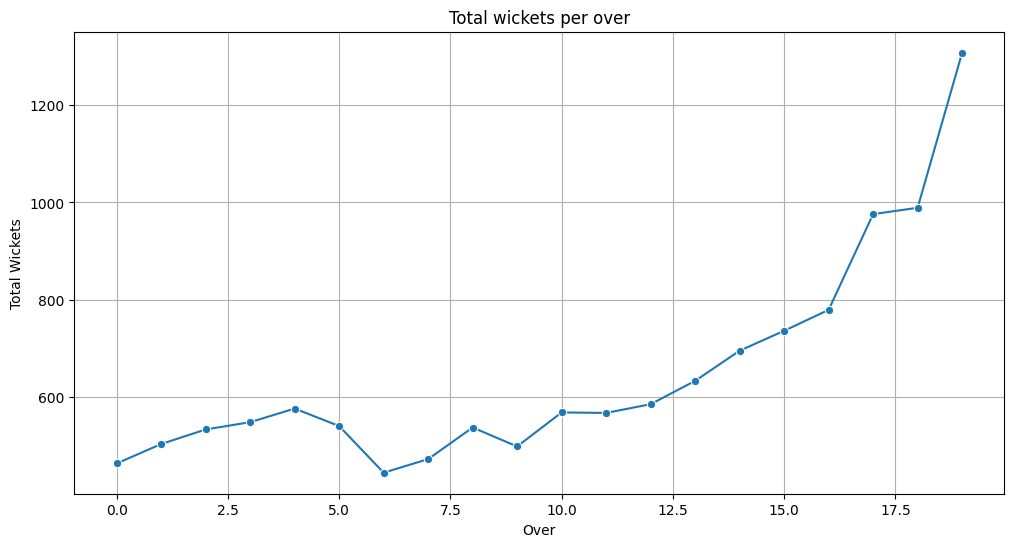

In [200]:
total_wickets_per_over = df_deliveries[df_deliveries['is_wicket'] == 1].groupby('over')['is_wicket'].sum().reset_index(name="count")
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_wickets_per_over, x='over', y='count', marker='o')
plt.grid(True)
plt.title('Total wickets per over')
plt.xlabel('Over')
plt.ylabel('Total Wickets')
plt.show()


Observations:
1. Death overs (16-20) are the overs with highest number of wickets 